In [1]:
from utils import *
import pandas as pd
from sklearn.datasets import make_friedman1, make_friedman2, make_friedman3

In [2]:
depths=(3,25,100)
arrays = [
    ['Parametric', 'Ackley', 'Franke', 'Nonpoly', 'Friedman 1', 'Friedman 2', 'Friedman 3'],
    [False, True],  # Noise
]

index = pd.MultiIndex.from_product(
    arrays, names=["Dataset", "Noise"])


df_gaus_rd = pd.DataFrame(
    index=index,
    columns=['D3rmse', 'D25rmse',  'D100rmse', 'D3corr', 'D25corr', 'D100corr'])

df_gaus_sd = pd.DataFrame(
    index=index,
    columns=['D3rmse', 'D25rmse',  'D100rmse', 'D3corr', 'D25corr', 'D100corr'])

df_lap_rd = pd.DataFrame(
    index=index,
    columns=['D3rmse', 'D25rmse',  'D100rmse', 'D3corr', 'D25corr', 'D100corr'])

df_lap_sd = pd.DataFrame(
    index=index,
    columns=['D3rmse', 'D25rmse',  'D100rmse', 'D3corr', 'D25corr', 'D100corr'])

df_gaus_rd

D3rmse D25rmse D100rmse D3corr D25corr D100corr
Dataset    Noise                                                
Parametric False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Ackley     False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Franke     False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Nonpoly    False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Friedman 1 False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Friedman 2 False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Friedman 3 False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN

# Datasets

In [3]:
datasets = []
# [X_train, y_train, X_test, y_test, norm, noise, name]

## Parametric

Text(0, 0.5, 'z')

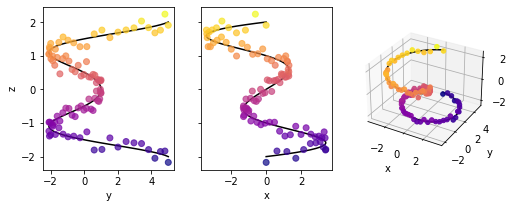

In [4]:
name = 'Parametric'
np.random.seed(12435908)
noise = 0.15

linear = np.linspace(0, 99, 100, dtype=int)
train_index = np.sort(np.random.choice(linear, 50, replace=False))
test_index = np.delete(linear, train_index)

z = np.linspace(-2, 2, 100)
t = np.linspace(-2*np.pi, 2*np.pi, 100)
x = (z**2 + 1) * np.sin(t)
y = (z**2 + 1) * np.cos(t)

X, y, y_noisy = np.column_stack((x,y)), z.reshape(-1,1), np.random.normal(z, scale=noise).reshape(-1,1)

X_train, y_train, y_train_noisy = X[train_index], y[train_index], y_noisy[train_index]
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = X[test_index], y[test_index], y_noisy[test_index]
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

# fig, ax = plot((X, X_train), (y.ravel(), y_train_noisy), typ='data', title=r"$z = f(x, y)$", figsize=(8, 2.5))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (8,3), sharey=True)
ax[2].remove()
ax[2] = plt.subplot(1,3,3,projection='3d')
ax[2].patch.set_alpha(0)
ax[2].plot(X[:,0], X[:,1], y.ravel(), c='black')
ax[2].scatter(X[:,0], X[:,1], y_noisy, c=y_noisy, cmap='plasma', alpha=.9)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

ax[1].plot(X[:,0], y.ravel(), c='black', zorder=0)
ax[1].scatter(X[:,0], y_noisy, c=y_noisy, alpha=.7, cmap='plasma')
ax[1].set_xlabel('x')
# ax[1].set_ylabel('z')

ax[0].plot(X[:,1], y.ravel(), c='black', zorder=0)
ax[0].scatter(X[:,1], y_noisy, c=y_noisy, alpha=.7, cmap='plasma')
ax[0].set_xlabel('y')
ax[0].set_ylabel('z')

In [5]:
fig.tight_layout()
fig.savefig('./exp/synth_2D/parametric/dataset.svg')

## Ackley

In [6]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [7]:
arrsize = 20

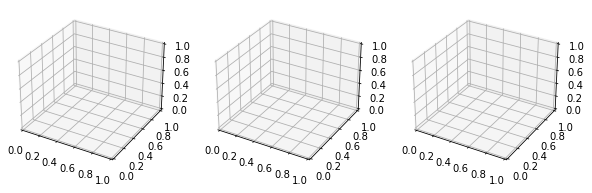

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(10,3), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)

In [9]:
name = 'Ackley'
noise = 0.75

tmp1 = sample(1,7, arrsize)
tmp2 = sample(1,7, arrsize)
tmp3 = sample(1,7, arrsize)
tmp4 = sample(1,7, arrsize)
X1, Y1 = np.meshgrid(tmp1, tmp2)    
Z1 = -20*np.exp(-0.2 * np.sqrt(0.5*(X1**2 + Y1**2))) - np.exp(0.5 *(np.cos(2*np.pi*X1) + np.cos(2*np.pi*Y1))) + np.e + 20
X2, Y2 = np.meshgrid(tmp3, tmp4)    
Z2 = -20*np.exp(-0.2 * np.sqrt(0.5*(X2**2 + Y2**2))) - np.exp(0.5 *(np.cos(2*np.pi*X2) + np.cos(2*np.pi*Y2))) + np.e + 20

bigX1 = np.stack((X1,Y1), axis=2).reshape(-1,2)
smolY1 = Z1.reshape(-1,1)
bigX2 = np.stack((X2,Y2), axis=2).reshape(-1,2)
smolY2 = Z2.reshape(-1,1)

X_train, y_train, y_train_noisy = bigX1, smolY1, np.random.normal(smolY1, scale=noise).reshape(-1,1)
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = bigX2, smolY2, np.random.normal(smolY2, scale=noise).reshape(-1,1)
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

ax[0].contourf(X1,Y1,Z1, levels=100)
ax[0].set_title(name)

Text(0.5, 0.92, 'Ackley')

## Franke

In [10]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [11]:
name = 'Franke'
noise = 0.1

tmp1 = sample(-0.5,1, arrsize)
tmp2 = sample(-0.5,1, arrsize)
tmp3 = sample(-0.5,1, arrsize)
tmp4 = sample(-0.5,1, arrsize)
X1, Y1 = np.meshgrid(tmp1, tmp2)     
Z1 = (0.75*np.exp(- (9*X1 - 2)**2/4 - (9*Y1 - 2)**2/4) + 
        0.75*np.exp(- (9*X1 + 1)**2/49 - (9*Y1 + 1)/10) +
        0.5*np.exp(- (9*X1 - 7)**2/4  - (9*Y1 - 3)**2/4) +
        0.2*np.exp(- (9*X1 - 4)**2    - (9*Y1 - 7)**2))
X2, Y2 = np.meshgrid(tmp3, tmp4)     
Z2 = (0.75*np.exp(- (9*X2 - 2)**2/4 - (9*Y2 - 2)**2/4) + 
        0.75*np.exp(- (9*X2 + 1)**2/49 - (9*Y2 + 1)/10) +
        0.5*np.exp(- (9*X2 - 7)**2/4  - (9*Y2 - 3)**2/4) +
        0.2*np.exp(- (9*X2 - 4)**2    - (9*Y2 - 7)**2))

bigX1 = np.stack((X1,Y1), axis=2).reshape(-1,2)
smolY1 = Z1.reshape(-1,1)
bigX2 = np.stack((X2,Y2), axis=2).reshape(-1,2)
smolY2 = Z2.reshape(-1,1)

X_train, y_train, y_train_noisy = bigX1, smolY1, np.random.normal(smolY1, scale=noise).reshape(-1,1)
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = bigX2, smolY2, np.random.normal(smolY2, scale=noise).reshape(-1,1)
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

ax[1].contourf(X1,Y1,Z1, levels=100)
ax[1].set_title(name)

Text(0.5, 0.92, 'Franke')

## Nonpolynomial

In [12]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [13]:
name = 'Nonpolynomial'
noise = 1

tmp1 = sample(0,2, arrsize)
tmp2 = sample(0,2, arrsize)
tmp3 = sample(0,2, arrsize)
tmp4 = sample(0,2, arrsize)
X1, Y1 = np.meshgrid(tmp1, tmp2)   
Z1 = 1/6 * ((30+5*X1*np.sin(5*X1))*(4+np.exp(-5*Y1)) - 100)
X2, Y2 = np.meshgrid(tmp3, tmp4)   
Z2 = 1/6 * ((30+5*X2*np.sin(5*X2))*(4+np.exp(-5*Y2)) - 100)

bigX1 = np.stack((X1,Y1), axis=2).reshape(-1,2)
smolY1 = Z1.reshape(-1,1)
bigX2 = np.stack((X2,Y2), axis=2).reshape(-1,2)
smolY2 = Z2.reshape(-1,1)

X_train, y_train, y_train_noisy = bigX1, smolY1, np.random.normal(smolY1, scale=noise).reshape(-1,1)
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = bigX2, smolY2, np.random.normal(smolY2, scale=noise).reshape(-1,1)
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])
ax[2].contourf(X1,Y1,Z1, levels=100)
ax[2].set_title(name)

Text(0.5, 0.92, 'Nonpolynomial')

In [14]:
np.corrcoef((y_test).ravel(), (y_test_noisy).ravel())[0,1]

0.9415871202569335

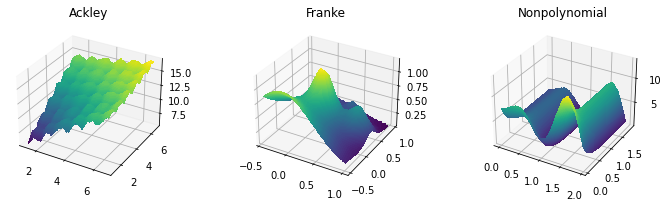

In [15]:
fig.tight_layout()
fig.savefig('./exp/synth_2D/2D.svg')
fig

## Friedman 1

In [16]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [17]:
name = 'Friedman 1'
noise = 1.5

X_train, y_train = make_friedman1(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman1(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman1(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman1(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

## Friedman 2

In [18]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [19]:
name = 'Friedman 2'
noise = 5

X_train, y_train = make_friedman2(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman2(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman2(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman2(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

## Friedman 3

In [20]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [21]:
name = 'Friedman 3'
noise = 0.15

X_train, y_train = make_friedman3(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman3(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman3(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman3(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

# Results

In [22]:
experiment_outputs = []
for data in datasets:
    for depth in (3, 25, 100):
        experiment_outputs.append(experiment(data, depth))

Parametric :
norm  = False
noise = 0.0
depth = 3
1.81**2 * NTK(depth=3, c=2.000, bias=2.906)
1.81**2 * Matern(length_scale=1e+05, nu=0.5)
1.81**2 * Matern(length_scale=16.6, nu=inf)
Parametric :
norm  = False
noise = 0.0
depth = 25


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.878**2 * NTK(depth=25, c=2.000, bias=1.692)
0.878**2 * Matern(length_scale=0.275, nu=0.5)
0.878**2 * Matern(length_scale=27.6, nu=inf)
Parametric :
norm  = False
noise = 0.0
depth = 100
0.46**2 * NTK(depth=100, c=2.000, bias=0.000)
0.46**2 * Matern(length_scale=0.0101, nu=0.5)
0.46**2 * Matern(length_scale=0.0355, nu=inf)
Parametric :
norm  = True
noise = 0.0
depth = 3


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


4.64**2 * NTK(depth=3, c=2.000, bias=26289.884)
4.64**2 * Matern(length_scale=765, nu=0.5)
4.64**2 * Matern(length_scale=0.654, nu=inf)
Parametric :
norm  = True
noise = 0.0
depth = 25
1.75**2 * NTK(depth=25, c=2.000, bias=5140.764)
1.75**2 * Matern(length_scale=0.178, nu=0.5)
1.75**2 * Matern(length_scale=0.624, nu=inf)
Parametric :
norm  = True
noise = 0.0
depth = 100
1.22**2 * NTK(depth=100, c=2.000, bias=10257.804)
1.22**2 * Matern(length_scale=0.0705, nu=0.5)
1.22**2 * Matern(length_scale=0.0404, nu=inf)
Parametric :
norm  = False
noise = 0.15
depth = 3
0.232**2 * NTK(depth=3, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.514)
0.232**2 * Matern(length_scale=3.68, nu=0.5) + WhiteKernel(noise_level=0.514)
0.232**2 * Matern(length_scale=2.75, nu=inf) + WhiteKernel(noise_level=0.514)
Parametric :
norm  = False
noise = 0.15
depth = 25
0.235**2 * NTK(depth=25, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.533)
0.235**2 * Matern(length_scale=3.56, nu=0.5) + WhiteKernel(noise_level=

/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1.51**2 * NTK(depth=100, c=2.000, bias=5.290)
1.51**2 * Matern(length_scale=1e+05, nu=0.5)
1.51**2 * Matern(length_scale=119, nu=inf)
Ackley :
norm  = True
noise = 0.0
depth = 3
62.9**2 * NTK(depth=3, c=2.000, bias=52362.909)
62.9**2 * Matern(length_scale=1.85, nu=0.5)
62.9**2 * Matern(length_scale=0.000123, nu=inf)
Ackley :
norm  = True
noise = 0.0
depth = 25
21.8**2 * NTK(depth=25, c=2.000, bias=19744.387)
21.8**2 * Matern(length_scale=0.165, nu=0.5)
21.8**2 * Matern(length_scale=0.000123, nu=inf)
Ackley :
norm  = True
noise = 0.0
depth = 100
10.9**2 * NTK(depth=100, c=2.000, bias=25451.670)
10.9**2 * Matern(length_scale=0.0445, nu=0.5)
10.9**2 * Matern(length_scale=0.000123, nu=inf)
Ackley :
norm  = False
noise = 0.15
depth = 3


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1**2 * NTK(depth=3, c=2.000, bias=5.884) + WhiteKernel(noise_level=0.16)
1**2 * Matern(length_scale=46.1, nu=0.5) + WhiteKernel(noise_level=0.16)
1**2 * Matern(length_scale=3.67, nu=inf) + WhiteKernel(noise_level=0.16)
Ackley :
norm  = False
noise = 0.15
depth = 25
0.823**2 * NTK(depth=25, c=2.000, bias=5.932) + WhiteKernel(noise_level=0.155)
0.823**2 * Matern(length_scale=38.2, nu=0.5) + WhiteKernel(noise_level=0.155)
0.823**2 * Matern(length_scale=3.38, nu=inf) + WhiteKernel(noise_level=0.155)
Ackley :
norm  = False
noise = 0.15
depth = 100
0.761**2 * NTK(depth=100, c=2.000, bias=6.059) + WhiteKernel(noise_level=0.144)
0.761**2 * Matern(length_scale=51.9, nu=0.5) + WhiteKernel(noise_level=0.144)
0.761**2 * Matern(length_scale=3.48, nu=inf) + WhiteKernel(noise_level=0.144)
Ackley :
norm  = True
noise = 0.15
depth = 3
7.88e-05**2 * NTK(depth=3, c=2.000, bias=0.000) + WhiteKernel(noise_level=1)
7.88e-05**2 * Matern(length_scale=1.81, nu=0.5) + WhiteKernel(noise_level=1)
7.88e-05**2 * Ma

/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


3.16e-05**2 * NTK(depth=25, c=2.000, bias=0.000) + WhiteKernel(noise_level=1)
3.16e-05**2 * Matern(length_scale=0.433, nu=0.5) + WhiteKernel(noise_level=1)
3.16e-05**2 * Matern(length_scale=0.276, nu=inf) + WhiteKernel(noise_level=1)
Ackley :
norm  = True
noise = 0.15
depth = 100
0.000117**2 * NTK(depth=100, c=2.000, bias=0.000) + WhiteKernel(noise_level=1)
0.000117**2 * Matern(length_scale=0.0302, nu=0.5) + WhiteKernel(noise_level=1)
0.000117**2 * Matern(length_scale=0.0204, nu=inf) + WhiteKernel(noise_level=1)
Franke :
norm  = False
noise = 0.0
depth = 3


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


7.05**2 * NTK(depth=3, c=2.000, bias=1.496)
7.05**2 * Matern(length_scale=1e+05, nu=0.5)
7.05**2 * Matern(length_scale=0.893, nu=inf)
Franke :
norm  = False
noise = 0.0
depth = 25
2.6**2 * NTK(depth=25, c=2.000, bias=1.130)
2.6**2 * Matern(length_scale=1e+05, nu=0.5)
2.6**2 * Matern(length_scale=2.98, nu=inf)
Franke :
norm  = False
noise = 0.0
depth = 100


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1.53**2 * NTK(depth=100, c=2.000, bias=0.895)
1.53**2 * Matern(length_scale=1e+05, nu=0.5)
1.53**2 * Matern(length_scale=2.65, nu=inf)
Franke :
norm  = True
noise = 0.0
depth = 3
24.6**2 * NTK(depth=3, c=2.000, bias=17969.011)
24.6**2 * Matern(length_scale=0.65, nu=0.5)
24.6**2 * Matern(length_scale=0.384, nu=inf)
Franke :
norm  = True
noise = 0.0
depth = 25
8.52**2 * NTK(depth=25, c=2.000, bias=11522.645)
8.52**2 * Matern(length_scale=0.194, nu=0.5)
8.52**2 * Matern(length_scale=0.356, nu=inf)
Franke :
norm  = True
noise = 0.0
depth = 100
4.28**2 * NTK(depth=100, c=2.000, bias=14976.857)
4.28**2 * Matern(length_scale=0.0676, nu=0.5)
4.28**2 * Matern(length_scale=0.352, nu=inf)
Franke :
norm  = False
noise = 0.15
depth = 3


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1.24**2 * NTK(depth=3, c=2.000, bias=0.586) + WhiteKernel(noise_level=0.157)
1.24**2 * Matern(length_scale=12.4, nu=0.5) + WhiteKernel(noise_level=0.157)
1.24**2 * Matern(length_scale=0.437, nu=inf) + WhiteKernel(noise_level=0.157)
Franke :
norm  = False
noise = 0.15
depth = 25


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1.02**2 * NTK(depth=25, c=2.000, bias=0.601) + WhiteKernel(noise_level=0.155)
1.02**2 * Matern(length_scale=9.68, nu=0.5) + WhiteKernel(noise_level=0.155)
1.02**2 * Matern(length_scale=0.452, nu=inf) + WhiteKernel(noise_level=0.155)
Franke :
norm  = False
noise = 0.15
depth = 100
0.933**2 * NTK(depth=100, c=2.000, bias=0.680) + WhiteKernel(noise_level=0.152)
0.933**2 * Matern(length_scale=12.1, nu=0.5) + WhiteKernel(noise_level=0.152)
0.933**2 * Matern(length_scale=0.604, nu=inf) + WhiteKernel(noise_level=0.152)
Franke :
norm  = True
noise = 0.15
depth = 3
0.737**2 * NTK(depth=3, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.645)
0.737**2 * Matern(length_scale=1.76, nu=0.5) + WhiteKernel(noise_level=0.645)
0.737**2 * Matern(length_scale=0.3, nu=inf) + WhiteKernel(noise_level=0.645)
Franke :
norm  = True
noise = 0.15
depth = 25
0.582**2 * NTK(depth=25, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.643)
0.582**2 * Matern(length_scale=0.258, nu=0.5) + WhiteKernel(noise_level=0.643)


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


8.24**2 * NTK(depth=25, c=2.000, bias=1.427)
8.24**2 * Matern(length_scale=0.022, nu=0.5)
8.24**2 * Matern(length_scale=76.9, nu=inf)
Nonpolynomial :
norm  = False
noise = 0.0
depth = 100
4.17**2 * NTK(depth=100, c=2.000, bias=1.411)
4.17**2 * Matern(length_scale=0.0219, nu=0.5)
4.17**2 * Matern(length_scale=54.1, nu=inf)
Nonpolynomial :
norm  = True
noise = 0.0
depth = 3
54.5**2 * NTK(depth=3, c=2.000, bias=34495.208)
54.5**2 * Matern(length_scale=2.1, nu=0.5)
54.5**2 * Matern(length_scale=0.0369, nu=inf)
Nonpolynomial :
norm  = True
noise = 0.0
depth = 25
18.9**2 * NTK(depth=25, c=2.000, bias=23521.792)
18.9**2 * Matern(length_scale=0.112, nu=0.5)
18.9**2 * Matern(length_scale=0.024, nu=inf)
Nonpolynomial :
norm  = True
noise = 0.0
depth = 100
9.45**2 * NTK(depth=100, c=2.000, bias=11890.399)
9.45**2 * Matern(length_scale=0.0291, nu=0.5)
9.45**2 * Matern(length_scale=0.0231, nu=inf)
Nonpolynomial :
norm  = False
noise = 0.15
depth = 3
0.892**2 * NTK(depth=3, c=2.000, bias=1.149) + Wh

/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.478**2 * NTK(depth=25, c=2.000, bias=1.033) + WhiteKernel(noise_level=0.75)
0.478**2 * Matern(length_scale=9.47, nu=0.5) + WhiteKernel(noise_level=0.75)
0.478**2 * Matern(length_scale=1.46, nu=inf) + WhiteKernel(noise_level=0.75)
Nonpolynomial :
norm  = False
noise = 0.15
depth = 100
0.441**2 * NTK(depth=100, c=2.000, bias=0.837) + WhiteKernel(noise_level=0.713)
0.441**2 * Matern(length_scale=9.76, nu=0.5) + WhiteKernel(noise_level=0.713)
0.441**2 * Matern(length_scale=1.51, nu=inf) + WhiteKernel(noise_level=0.713)
Nonpolynomial :
norm  = True
noise = 0.15
depth = 3
0.853**2 * NTK(depth=3, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.805)
0.853**2 * Matern(length_scale=1.96, nu=0.5) + WhiteKernel(noise_level=0.805)
0.853**2 * Matern(length_scale=0.211, nu=inf) + WhiteKernel(noise_level=0.805)
Nonpolynomial :
norm  = True
noise = 0.15
depth = 25
0.511**2 * NTK(depth=25, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.796)
0.511**2 * Matern(length_scale=0.289, nu=0.5) + WhiteKerne

/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.884**2 * NTK(depth=25, c=2.000, bias=2.153)
0.884**2 * Matern(length_scale=0.407, nu=0.5)
0.884**2 * Matern(length_scale=790, nu=inf)
Friedman 1 :
norm  = False
noise = 0.0
depth = 100
0.96**2 * NTK(depth=100, c=2.000, bias=2.540)
0.96**2 * Matern(length_scale=0.251, nu=0.5)
0.96**2 * Matern(length_scale=1.59e+03, nu=inf)
Friedman 1 :
norm  = True
noise = 0.0
depth = 3
1.59**2 * NTK(depth=3, c=2.000, bias=0.613)
1.59**2 * Matern(length_scale=3.79, nu=0.5)
1.59**2 * Matern(length_scale=10.6, nu=inf)
Friedman 1 :
norm  = True
noise = 0.0
depth = 25


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1.08**2 * NTK(depth=25, c=2.000, bias=0.000)
1.08**2 * Matern(length_scale=0.24, nu=0.5)
1.08**2 * Matern(length_scale=436, nu=inf)
Friedman 1 :
norm  = True
noise = 0.0
depth = 100
1.12**2 * NTK(depth=100, c=2.000, bias=0.000)
1.12**2 * Matern(length_scale=0.121, nu=0.5)
1.12**2 * Matern(length_scale=1.04e+03, nu=inf)
Friedman 1 :
norm  = False
noise = 0.15
depth = 3


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1.16**2 * NTK(depth=3, c=2.000, bias=1.695) + WhiteKernel(noise_level=0.000306)
1.16**2 * Matern(length_scale=5.98, nu=0.5) + WhiteKernel(noise_level=0.000306)
1.16**2 * Matern(length_scale=7.9, nu=inf) + WhiteKernel(noise_level=0.000306)
Friedman 1 :
norm  = False
noise = 0.15
depth = 25


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.937**2 * NTK(depth=25, c=2.000, bias=2.381) + WhiteKernel(noise_level=0.000303)
0.937**2 * Matern(length_scale=0.402, nu=0.5) + WhiteKernel(noise_level=0.000303)
0.937**2 * Matern(length_scale=148, nu=inf) + WhiteKernel(noise_level=0.000303)
Friedman 1 :
norm  = False
noise = 0.15
depth = 100
0.992**2 * NTK(depth=100, c=2.000, bias=2.815) + WhiteKernel(noise_level=0.000299)
0.992**2 * Matern(length_scale=6.8e+04, nu=0.5) + WhiteKernel(noise_level=0.000299)
0.992**2 * Matern(length_scale=298, nu=inf) + WhiteKernel(noise_level=0.000299)
Friedman 1 :
norm  = True
noise = 0.15
depth = 3
1.57**2 * NTK(depth=3, c=2.000, bias=0.402) + WhiteKernel(noise_level=0.0413)
1.57**2 * Matern(length_scale=1.86, nu=0.5) + WhiteKernel(noise_level=0.0413)
1.57**2 * Matern(length_scale=1.3, nu=inf) + WhiteKernel(noise_level=0.0413)
Friedman 1 :
norm  = True
noise = 0.15
depth = 25


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__bias is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


1.1**2 * NTK(depth=25, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.0001)
1.1**2 * Matern(length_scale=0.237, nu=0.5) + WhiteKernel(noise_level=0.0001)
1.1**2 * Matern(length_scale=133, nu=inf) + WhiteKernel(noise_level=0.0001)
Friedman 1 :
norm  = True
noise = 0.15
depth = 100


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-04. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


1.12**2 * NTK(depth=100, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.0001)
1.12**2 * Matern(length_scale=1e+05, nu=0.5) + WhiteKernel(noise_level=0.0001)
1.12**2 * Matern(length_scale=315, nu=inf) + WhiteKernel(noise_level=0.0001)
Friedman 2 :
norm  = False
noise = 0.0
depth = 3
0.964**2 * NTK(depth=3, c=2.000, bias=55.327)
0.964**2 * Matern(length_scale=27, nu=0.5)
0.964**2 * Matern(length_scale=9.69e+03, nu=inf)
Friedman 2 :
norm  = False
noise = 0.0
depth = 25
0.706**2 * NTK(depth=25, c=2.000, bias=115.922)
0.706**2 * Matern(length_scale=26.9, nu=0.5)
0.706**2 * Matern(length_scale=7.04e+03, nu=inf)
Friedman 2 :
norm  = False
noise = 0.0
depth = 100


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.61**2 * NTK(depth=100, c=2.000, bias=196.933)
0.61**2 * Matern(length_scale=26.4, nu=0.5)
0.61**2 * Matern(length_scale=1e+05, nu=inf)
Friedman 2 :
norm  = True
noise = 0.0
depth = 3
22.4**2 * NTK(depth=3, c=2.000, bias=20570.034)
22.4**2 * Matern(length_scale=1.44, nu=0.5)
22.4**2 * Matern(length_scale=0.00167, nu=inf)
Friedman 2 :
norm  = True
noise = 0.0
depth = 25
7.76**2 * NTK(depth=25, c=2.000, bias=20623.664)
7.76**2 * Matern(length_scale=0.138, nu=0.5)
7.76**2 * Matern(length_scale=0.00167, nu=inf)
Friedman 2 :
norm  = True
noise = 0.0
depth = 100
3.91**2 * NTK(depth=100, c=2.000, bias=6922.585)
3.91**2 * Matern(length_scale=0.0648, nu=0.5)
3.91**2 * Matern(length_scale=0.00167, nu=inf)
Friedman 2 :
norm  = False
noise = 0.15
depth = 3
0.913**2 * NTK(depth=3, c=2.000, bias=52.474) + WhiteKernel(noise_level=0.000301)
0.913**2 * Matern(length_scale=1e+05, nu=0.5) + WhiteKernel(noise_level=0.000301)
0.913**2 * Matern(length_scale=1.34e+03, nu=inf) + WhiteKernel(noise_level=0.000

/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__bias is close to the specified upper bound 1e+05. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


2.59**2 * NTK(depth=100, c=2.000, bias=100000.000)
2.59**2 * Matern(length_scale=24.1, nu=0.5)
2.59**2 * Matern(length_scale=9.06e+03, nu=inf)
Friedman 3 :
norm  = True
noise = 0.0
depth = 3
14.3**2 * NTK(depth=3, c=2.000, bias=22311.629)
14.3**2 * Matern(length_scale=1.43, nu=0.5)
14.3**2 * Matern(length_scale=1.56e+03, nu=inf)
Friedman 3 :
norm  = True
noise = 0.0
depth = 25
5.01**2 * NTK(depth=25, c=2.000, bias=11804.260)
5.01**2 * Matern(length_scale=0.154, nu=0.5)
5.01**2 * Matern(length_scale=554, nu=inf)
Friedman 3 :
norm  = True
noise = 0.0
depth = 100
2.59**2 * NTK(depth=100, c=2.000, bias=12706.923)
2.59**2 * Matern(length_scale=0.0577, nu=0.5)
2.59**2 * Matern(length_scale=302, nu=inf)
Friedman 3 :
norm  = False
noise = 0.15
depth = 3


/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__bias is close to the specified upper bound 1e+05. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


4.77**2 * NTK(depth=3, c=2.000, bias=100000.000) + WhiteKernel(noise_level=0.356)
4.77**2 * Matern(length_scale=1.16e+04, nu=0.5) + WhiteKernel(noise_level=0.356)
4.77**2 * Matern(length_scale=398, nu=inf) + WhiteKernel(noise_level=0.356)
Friedman 3 :
norm  = False
noise = 0.15
depth = 25
2.05**2 * NTK(depth=25, c=2.000, bias=20379.470) + WhiteKernel(noise_level=0.321)
2.05**2 * Matern(length_scale=2.13e+03, nu=0.5) + WhiteKernel(noise_level=0.321)
2.05**2 * Matern(length_scale=327, nu=inf) + WhiteKernel(noise_level=0.321)
Friedman 3 :
norm  = False
noise = 0.15
depth = 100
1.53**2 * NTK(depth=100, c=2.000, bias=9342.385) + WhiteKernel(noise_level=0.242)
1.53**2 * Matern(length_scale=1.56e+03, nu=0.5) + WhiteKernel(noise_level=0.242)
1.53**2 * Matern(length_scale=129, nu=inf) + WhiteKernel(noise_level=0.242)
Friedman 3 :
norm  = True
noise = 0.15
depth = 3
4.57**2 * NTK(depth=3, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.363)
4.57**2 * Matern(length_scale=2.09, nu=0.5) + WhiteKer

In [31]:
df_lap_sd

D3rmse D25rmse D100rmse D3corr D25corr D100corr
Dataset    Noise                                                
Parametric False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Ackley     False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Franke     False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Nonpoly    False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Friedman 1 False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Friedman 2 False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN
Friedman 3 False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN

In [49]:
import os
os.getcwd() + '/synth.dat'

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/rlencevicius1/code/thesis/synth.dat'

In [52]:
test = load_data('./synth')

In [37]:
for exp in experiment_outputs:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if name == 'Nonpolynomial':
        name = 'Nonpoly'

    if exp['dataset']['norm']:
        df_lap_sd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_sd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_sd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_sd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']
    else:
        df_lap_rd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_rd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_rd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_rd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']

In [38]:
df_lap_sd

D3rmse   D25rmse  D100rmse    D3corr   D25corr  D100corr
Dataset    Noise                                                            
Parametric False  0.024957  0.040152  0.117432  0.999774   0.99919  0.980372
           True   0.031416  0.029728       0.0  0.998362  0.986742  0.954045
Ackley     False  0.000006   0.00043  0.007222       1.0       1.0  0.999994
           True        0.0       0.0       0.0  0.996178  0.991223  0.972523
Franke     False   0.00414  0.003443  0.012892  0.999835   0.99989  0.998398
           True   0.003085  0.009026  0.017403  0.999859  0.999479   0.99624
Nonpoly    False  0.000007   0.00032  0.006311       1.0       1.0  0.999997
           True   0.016147  0.040134  0.076272  0.999951  0.999869  0.999238
Friedman 1 False  0.178904  0.346401  0.386598  0.999194  0.995182  0.971319
           True   0.262788  0.357227  0.360165  0.999023  0.995351  0.964327
Friedman 2 False  0.017825  0.801129  4.677699       1.0  0.999994  0.999807
           True   1.659798  3.690286  8.029223  0.999911  0.999743  0.998867
Friedman 3 False  0.000022  0.001151  0.008004       1.0  0.999987  0.999321
           True   0.000618  0.001987  0.010704  0.999996  0.999962  0.998823

In [39]:
df_gaus_sd

D3rmse     D25rmse    D100rmse    D3corr   D25corr  \
Dataset    Noise                                                           
Parametric False    0.360989    0.366942    0.300397   0.95093  0.943283   
           True      0.04122     0.05915         0.0  0.997988  0.951311   
Ackley     False    1.680325    1.679328    1.672418  0.472675  0.472906   
           True          0.0         0.0         0.0  0.812672  0.865892   
Franke     False    0.134404    0.133507    0.130368  0.808932  0.808484   
           True     0.017651    0.019312    0.030339  0.994533  0.993168   
Nonpoly    False    1.444286    1.448463    1.442926  0.801444  0.805516   
           True     0.170219    0.142049    0.191428  0.990296  0.993552   
Friedman 1 False    0.745574    1.040405    0.393515  0.983897  0.911007   
           True     0.631652    1.118469    0.414175  0.989591  0.909174   
Friedman 2 False  138.841693  138.635039  137.644324  0.806283   0.80707   
           True    18.182303   25.269659   32.323968  0.990588  0.982639   
Friedman 3 False    0.149345    0.150165    0.146101  0.726468  0.722917   
           True     0.043516    0.053056    0.072072  0.976677  0.967113   

                  D100corr  
Dataset    Noise            
Parametric False   0.85578  
           True   0.825914  
Ackley     False  0.474428  
           True   0.903236  
Franke     False  0.800869  
           True    0.98068  
Nonpoly    False  0.805848  
           True   0.987567  
Friedman 1 False  0.914183  
           True   0.913851  
Friedman 2 False  0.809647  
           True   0.969985  
Friedman 3 False  0.727203  
           True   0.948871

In [40]:
df_lap_rd

D3rmse     D25rmse    D100rmse    D3corr   D25corr  \
Dataset    Noise                                                           
Parametric False    0.336077     0.56477    0.344407  0.923402  0.319844   
           True     0.425926    0.246857    0.120714  0.961488  0.893334   
Ackley     False    0.643005    0.606037    0.566447  0.961755  0.965387   
           True     0.237534    0.322822    0.420371    0.9942  0.988767   
Franke     False    0.087874    0.084625    0.083108  0.939219  0.943125   
           True       0.0495    0.056967    0.063966  0.980129   0.97272   
Nonpoly    False     2.69627    2.692165    2.647524  0.296324  0.296894   
           True     0.718593    0.777061    0.857439  0.829471   0.79374   
Friedman 1 False    0.603395     0.73147    0.333989   0.99066  0.959868   
           True     0.630993    0.788156    0.247841  0.991668  0.959329   
Friedman 2 False   214.57718  216.403089  218.619411  0.623922  0.621824   
           True   190.745665  185.352672   186.77847  0.745985  0.753415   
Friedman 3 False    0.179668    0.178342    0.175558  0.589863  0.590833   
           True     0.095958    0.106358    0.122797  0.874992   0.85201   

                  D100corr  
Dataset    Noise            
Parametric False   0.00705  
           True   0.812863  
Ackley     False  0.968998  
           True   0.980104  
Franke     False  0.943679  
           True   0.963422  
Nonpoly    False  0.298898  
           True   0.745629  
Friedman 1 False  0.959224  
           True   0.979882  
Friedman 2 False  0.616028  
           True   0.749551  
Friedman 3 False  0.584478  
           True   0.807734

In [41]:
df_gaus_rd

D3rmse     D25rmse    D100rmse    D3corr   D25corr  \
Dataset    Noise                                                           
Parametric False    0.272955    0.473533    0.344405  0.952149  0.766722   
           True     0.354796     0.18814     0.13568  0.974037   0.93753   
Ackley     False    0.543845    0.544038    0.539515  0.971248   0.97107   
           True     0.239863    0.337293    0.445678  0.994097  0.988271   
Franke     False    0.081437    0.082849    0.082168  0.947382  0.944501   
           True     0.055686    0.062633    0.068561  0.974913  0.967668   
Nonpoly    False    2.570518    2.565254    2.510271  0.412008   0.41343   
           True     0.689528    0.759263    0.839228  0.841657   0.80218   
Friedman 1 False     0.85512    0.848035    0.276458   0.98771   0.94551   
           True     0.925293    0.936095    0.301491  0.987071  0.941262   
Friedman 2 False  171.205686  175.871299  181.950136  0.775102  0.766852   
           True   168.022691  172.746525  178.025914  0.784762  0.778802   
Friedman 3 False    0.163858    0.162737    0.157871  0.685322   0.68851   
           True     0.101239    0.111277    0.123356  0.875484  0.843353   

                  D100corr  
Dataset    Noise            
Parametric False  0.011563  
           True   0.757767  
Ackley     False  0.971139  
           True   0.979521  
Franke     False  0.944443  
           True   0.960286  
Nonpoly    False  0.424293  
           True   0.756652  
Friedman 1 False  0.973262  
           True   0.970069  
Friedman 2 False   0.75152  
           True   0.767607  
Friedman 3 False   0.69922  
           True   0.824448

In [42]:
save_data(experiment_outputs, './synth')